### Objective
To implement Harris Corner Detection from scratch using OpenCV in Python and visualize the detected corners along with the original image and response map.

### AIM
To detect corners in an image by computing the Harris response function using gradient-based techniques and visualize the detected features for further image analysis.

### Theory
Harris Corner Detection is a feature detection algorithm used in computer vision to identify points in an image where the intensity changes significantly in multiple directions, making them suitable as key points for image matching and tracking.

1. Convert Image to Grayscale

2. Compute Image Gradients (Sobel Operator)

3. Compute Structure Tensor Components

4. Apply Gaussian Filtering to Smooth the Tensor

5. Compute the Harris Response Function:

            R = det(M) - k - (trace(M))^2

6. Threshold and Mark the corners

### Why is Harris Corner Detection Important?
1. A corner is a point where the intensity of an image changes significantly in both directions.
2. Harris detection is rotation-invariant, meaning it works well under transformations.
3. It is widely used in feature matching, tracking, and object recognition.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Function to implement Harris Corner Detection from scratch
def harris_corner_detection(image_path, k=0.04, threshold=0.25):
    image = cv2.imread(image_path)
    original_image = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy

    Ixx = cv2.GaussianBlur(Ixx, (3, 3), 1)
    Iyy = cv2.GaussianBlur(Iyy, (3, 3), 1)
    Ixy = cv2.GaussianBlur(Ixy, (3, 3), 1)

    det_M = (Ixx * Iyy) - (Ixy ** 2)
    trace_M = Ixx + Iyy
    R = det_M - k * (trace_M ** 2)

    R_norm = cv2.normalize(R, None, 0, 1, cv2.NORM_MINMAX)
    corner_mask = (R_norm > threshold)

    corners = np.argwhere(corner_mask)

    for y, x in corners:
        cv2.circle(image, (x, y), 3, (0, 0, 255), -1)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")


    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Harris Corner Detection")
    plt.axis("off")


    plt.subplot(1, 3, 3)
    plt.imshow(R, cmap='jet')
    plt.title("Harris Response Map")
    plt.axis("off")

    plt.show()

Saving hc_1.jpeg to hc_1 (4).jpeg


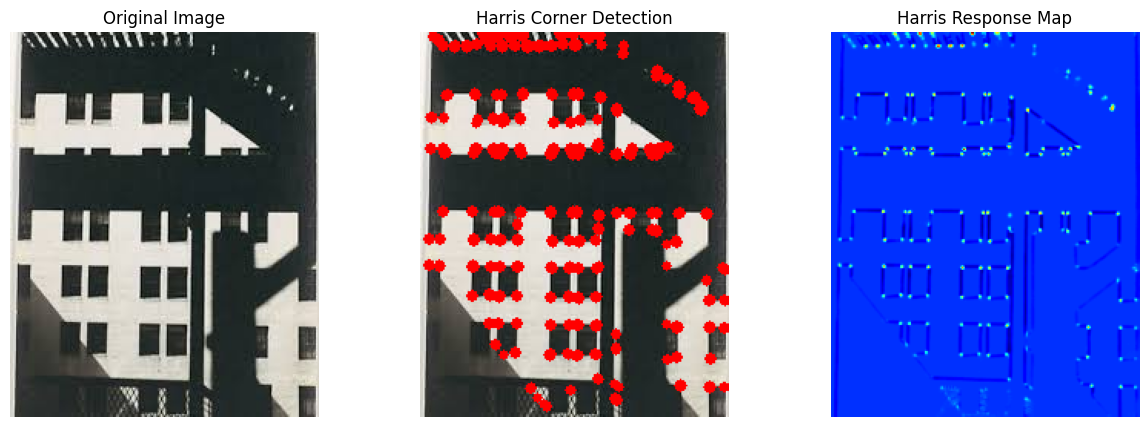

In [ ]:
from google.colab import files
uploaded = files.upload()

image_path = list(uploaded.keys())[0]


harris_corner_detection(image_path)

### Application
1. Object Recognition
2. Motion Tracking
3. Augmented Reality (AR)

### Limitations
1. Sensitive to Scale Changes
2. Not Robust to Illumination Variations – Performance drops when brightness or contrast changes.
3. Not Rotation-Invariant for Large Angles – Works well for small rotations but struggles with extreme transformations.
4. Fixed Window Size – Uses a fixed-size neighborhood, which may not work well for all image scales.

### Conclusion
The algorithm efficiently detects corners in an image by computing gradient-based structure tensor components and evaluating the Harris response function. By applying a Gaussian filter, we smooth the gradients to enhance feature detection accuracy. Finally, by thresholding the response values, we extract and visualize corner points on the original image. The results demonstrate that Harris Corner Detection is a powerful and reliable method for feature extraction in images. The method is rotation-invariant and effective for image stitching, object tracking, and motion analysis. It is faster than more complex keypoint detection methods like SIFT or SURF.